In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
df = pd.read_csv('input\\results_complete_linear.csv')

In [3]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['elem_damaged', 'damage'], axis=1), df['elem_damaged'], test_size=0.10, random_state=41)

In [5]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [126]:
model = keras.Sequential()
model.add(keras.Input(shape=(126)))
model.add(keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer=tf.keras.initializers.HeNormal())) #80
model.add(tf.keras.layers.Dropout(.4)) #sem dropout
model.add(keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dropout(.4))
model.add(keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dropout(.4))
model.add(keras.layers.Dense(129, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               12700     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 129)              

In [127]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])

In [128]:
%%time
history = model.fit(X_train, y_train, epochs=3000, validation_data=(X_test, y_test)) #1000 epocas

Epoch 1/3000
726/726 [==============================] - 2s 2ms/step - loss: 5.3917 - accuracy: 0.0096 - val_loss: 4.8417 - val_accuracy: 0.0151
Epoch 2/3000
726/726 [==============================] - 1s 2ms/step - loss: 5.1610 - accuracy: 0.0115 - val_loss: 4.7715 - val_accuracy: 0.0264
Epoch 3/3000
726/726 [==============================] - 1s 2ms/step - loss: 5.0233 - accuracy: 0.0145 - val_loss: 4.7257 - val_accuracy: 0.0438
Epoch 4/3000
726/726 [==============================] - 1s 2ms/step - loss: 4.9370 - accuracy: 0.0196 - val_loss: 4.6936 - val_accuracy: 0.0574
Epoch 5/3000
726/726 [==============================] - 1s 2ms/step - loss: 4.8845 - accuracy: 0.0208 - val_loss: 4.6673 - val_accuracy: 0.0748
Epoch 6/3000
726/726 [==============================] - 1s 2ms/step - loss: 4.8392 - accuracy: 0.0273 - val_loss: 4.6433 - val_accuracy: 0.0802
Epoch 7/3000
726/726 [==============================] - 1s 2ms/step - loss: 4.8063 - accuracy: 0.0315 - val_loss: 4.6202 - val_accuracy:

In [125]:
model.save('models\\linear')

INFO:tensorflow:Assets written to: models\linear\assets


INFO:tensorflow:Assets written to: models\linear\assets


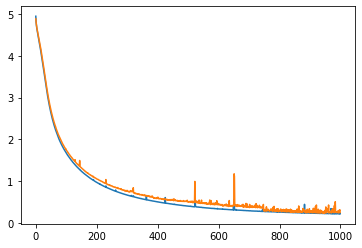

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [41]:
pred = model.predict(X_test)

81/81 [==============================] - 0s 836us/step


In [42]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       0.81      0.94      0.87        18
           2       1.00      0.83      0.90        23
           3       1.00      1.00      1.00        20
           4       0.96      1.00      0.98        23
           5       0.36      1.00      0.53        20
           6       1.00      0.96      0.98        23
           7       0.89      1.00      0.94        25
           8       1.00      0.96      0.98        25
           9       1.00      1.00      1.00        13
          10       1.00      0.17      0.30        23
          11       1.00      0.94      0.97        17
          12       1.00      0.88      0.93        16
          13       1.00      0.87      0.93        31
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        25
          17       1.00    

In [60]:
df_exp = pd.read_csv('input\\results_complete_exponential.csv')

In [119]:
X_test_exp = scaler.fit_transform(df_exp.drop(['elem_damaged', 'damage'], axis=1))

In [120]:
y_test_exp = hot_encoder.fit_transform(df_exp['elem_damaged'].values.reshape(-1, 1))

In [121]:
pred = model.predict(X_test_exp)

807/807 [==============================] - 1s 725us/step


In [122]:
print(classification_report(np.argmax(y_test_exp, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.36      0.42      0.39       200
           1       0.05      0.04      0.05       200
           2       0.95      0.61      0.74       200
           3       0.00      0.00      0.00       200
           4       0.92      0.18      0.30       200
           5       0.44      0.15      0.22       200
           6       0.72      0.44      0.54       200
           7       0.83      0.60      0.70       200
           8       0.89      0.17      0.29       200
           9       0.95      0.51      0.66       200
          10       0.10      0.04      0.05       200
          11       0.82      0.25      0.38       200
          12       0.15      0.63      0.25       200
          13       0.00      0.00      0.00       200
          14       0.88      0.39      0.53       200
          15       0.90      0.94      0.92       200
          16       0.83      0.56      0.67       200
          17       0.88    

C:\Users\Gabriel\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabriel\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabriel\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [71]:
df_sig = pd.read_csv('input\\results_complete_sigmoid_like.csv')

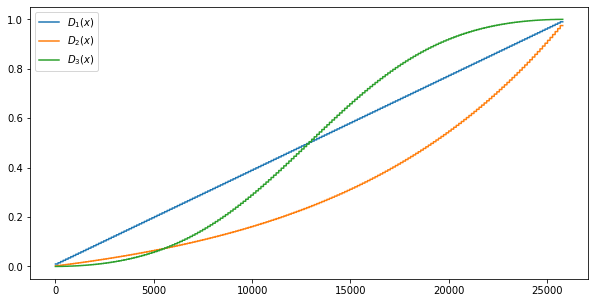

In [124]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['damage']*-1 + 1)
plt.plot(df_exp.index, df_exp['damage']*-1 + 1)
plt.plot(df_sig.index, df_sig['damage']*-1 + 1)
plt.legend(["$D_1(x)$", "$D_2(x)$", "$D_3(x)$"])
plt.show()